# BiCEP Examples Notebook
This notebook runs through examples of how to use BiCEP manually through the BiCEP package. The functionality in this package shows how to get plots out of BiCEP for manual editing with matplotlib. Almost all of the functionality detailed here can be obtained through the GUI, but some users may prefer to write their own code using the standard functions in BiCEP.

## Library import

Run the following cell to import the BiCEP module.

In [1]:
import matplotlib.pyplot as plt

## Data conversion

We can produce a data file that BiCEP can read internally from the magic format using the `generate_arai_plot_table` function in the `conversion` module. We will specify an output name of `BiCEP_converted.csv`. This gets dumped in the folder with the datafiles. For your convenience, we have included a set of MagIC formatted data to convert to the BiCEP format. This may take a few minutes

In [2]:
from BiCEP.conversion import generate_arai_plot_table
project='example_magic_files/'
fname = 'BiCEP_converted'
generate_arai_plot_table(fname,project)

Data conversion finished- check thellier_convert.log for errors


When imported, BiCEP data is stored internally as a set of nested objects, one for the dataset which contains a object for each site (a set of samples expected to have been magnetized in the same field), or each sample (an object collected in the field) which are described using a SpecimenCollection object. Each of these SpecimenCollection objects contains an object for each specimen, which is a subsample that a set of independent measurements are made on. To make the data class, we can initialize a `ThellierData` object using our `BiCEP_converted.csv` file. This may take a few seconds to create all of the objects. Printing our ThellierData object allows us to see the number of sites and specimens.

In [3]:
from BiCEP.datamodel import ThellierData
data=ThellierData(project+fname+'.csv')
print(data)

Set of Thellier Data Containing the Sites:
1991-1992 Eruption Site	(53 specimens)
hw108	(23 specimens)
hw123	(12 specimens)
hw126	(13 specimens)
hw128	(26 specimens)
hw201	(12 specimens)
hw226	(11 specimens)
hw241	(18 specimens)
BR06	(3 specimens)
P	(36 specimens)
VM	(18 specimens)
BBQ	(12 specimens)
rs25	(5 specimens)
rs26	(5 specimens)
rs27	(10 specimens)
remag-rs61	(6 specimens)
remag-rs62	(6 specimens)
remag-rs63	(5 specimens)
remag-rs78	(4 specimens)
kf	(3 specimens)
Hawaii 1960 Flow	(22 specimens)
SW	(19 specimens)
TS	(53 specimens)
ET1	(3 specimens)
ET2	(2 specimens)
ET3	(4 specimens)
Synthetic60	(7 specimens)
LV	(45 specimens)
MSH	(19 specimens)
FreshTRM	(24 specimens)



## Data processing and analysis
### Looking at site and specimen data

We can index for our sites and specimens using a key for the site name. Let's look at site "hw126" and print out the object to see the specimens. This site is a lava flow erupted in Hawaii in 1935 and originally analyzed by Cromwell et al (2015). Because this eruption occurred in the age of instrumentation, we know that the original field this lava flow was erupted in was approximately 36.4 μT.


In [4]:
site=data['hw126']
print(site)

Site containing the specimens:
hw126a1
hw126a2
hw126a3
hw126a4
hw126a5
hw126b1
hw126b2
hw126b3
hw126b4
hw126b5
hw126a6
hw126a7
hw126a8



Let's take a look at some of these data from one of the specimens from this site. We can use the `plot_arai()` method on our specimen to plot the Thellier data on an Arai plot (Nagata & Arai, 1963), which shows the magnitude of the magnetization lost by cooling in zero field against the magnetization gained when cooling in a known field. We can also plot a Zijderveld plot using the `plot_zijd` method, which plots the magnetization vectors of the zero field steps. In the zijderveld plot, black circles represent the component of the magnetization in the x,y plane, whereas red squares represent the component in the x,z plane.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


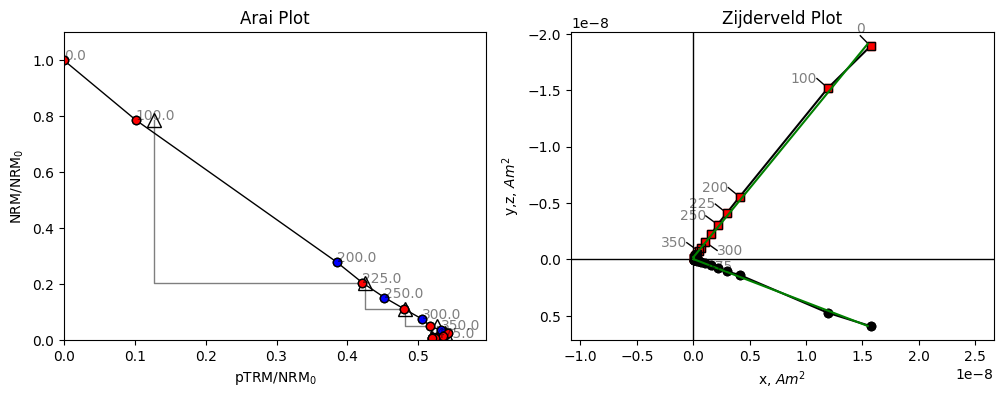

In [5]:
specimen=site['hw126a1']
fig,ax=plt.subplots(1,2,figsize=(12,4))
specimen.plot_arai(ax[0])
specimen.plot_zijd(ax[1])
ax[0].set_title('Arai Plot')
ax[1].set_title('Zijderveld Plot');

Both our Arai plot and Zijderveld plot are a straight line. Because we're plotting magnetization lost in zero field, against magnetization gained in a known field, the ratio of our two lines is the ratio of the Ancient field to the Lab field which is a little under 2. We can check the lab field using the `B_lab` attribute of the specimen.

In [6]:
specimen.B_lab

np.float64(20.0)

The lab field was 20 μT. If we expect a value of 36.4 μT, then a slope of about 1.8 is what we might expect. Let's look at another specimen.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


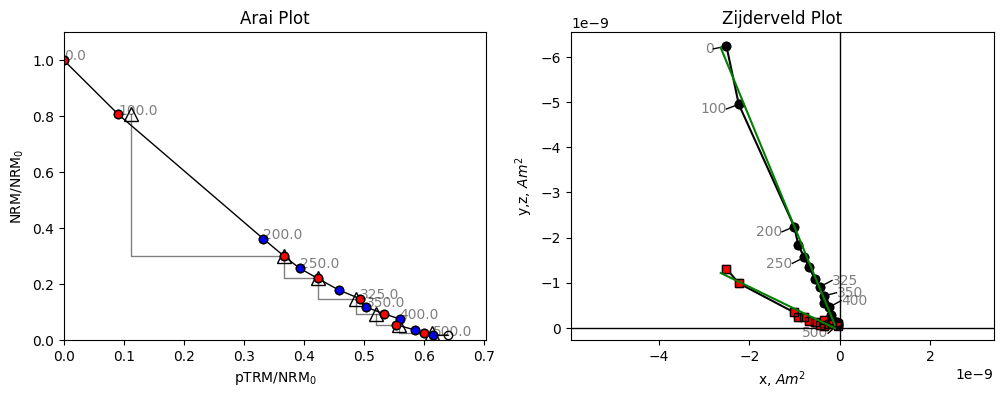

In [7]:
specimen=site['hw126a2']
fig,ax=plt.subplots(1,2,figsize=(12,4))
specimen.plot_arai(ax[0])
specimen.plot_zijd(ax[1])
ax[0].set_title('Arai Plot')
ax[1].set_title('Zijderveld Plot');

The data for this specimen do not follow a straight line. Although the line slope appears to start out at a reasonable value, it quickly becomes shallower at higher temperatures. If we were to fit a line to these data we might end up with an underestimate of the paleointensity, and there is no reason to suggest which temperature range to pick for our intensity data. Some strict selection criteria might exclude this specimen, others might include it, but could include an incorrect temperature range, which could give a biased paleointensity estimate.

### The BiCEP method- accounting for bias

BiCEP works differently. It fits a circle to a scaled set of paleointensity data and uses the tangent joining the circle center and the origin. BiCEP generates many circle fits from a probability distribution. Let's look at the circle fits that BiCEP samples from the posterior distribution, and the median tangent which we use to fit the line. BiCEP fits are performed at a site level for a reason which will become apparent later. We can use the method `site.BiCEP_fit()` to fit the BiCEP method (this may take several minutes depending on the speed of your processor and memory available) and plot the circle and tangent fits to the data.


In [8]:
site.BiCEP_fit()
#This cell may generate warnings from the internal pystan code. 
#The main error to watch for is one about R_hat, which indicates the sampler hasn't converged, a "bad" run

19:21:10 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

19:21:44 - cmdstanpy - INFO - CmdStan done processing.


19:21:45 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 138 divergent transitions (0.5%)
	Chain 2 had 92 divergent transitions (0.3%)
	Chain 3 had 178 divergent transitions (0.6%)
	Chain 4 had 171 divergent transitions (0.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


We can use the `specimen.plot_circ()` method to draw a circle under the Arai plot data. The `tangent=True` argument shows the tangent to the circle used to calculate the paleointensity for this specimen.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


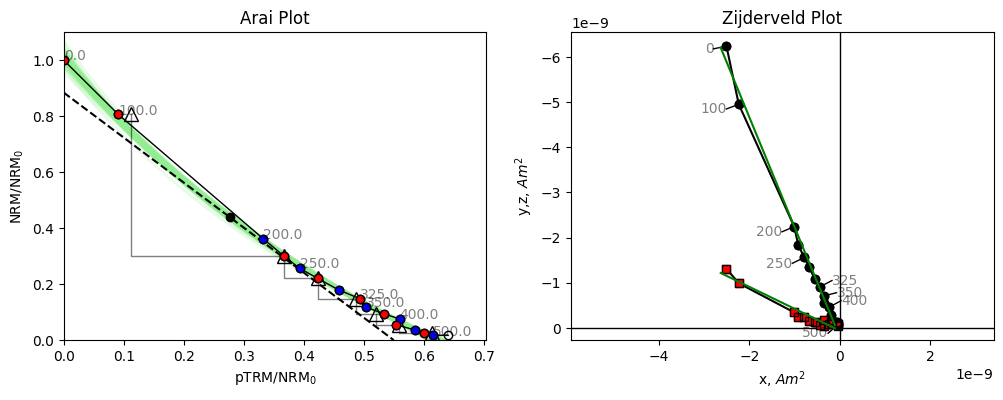

In [9]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
specimen.plot_circ(ax[0],tangent=True)
specimen.plot_arai(ax[0])
specimen.plot_zijd(ax[1])
ax[0].set_title('Arai Plot')
ax[1].set_title('Zijderveld Plot');

We notice that this tangent is slightly less than the initial slope, how does this help us?

BiCEP assumes that the curvature, $\vec{k}$
(1/radius with sign depending on direction of curvature, Paterson, 2011) of the circle fit is proportional to the calculated ancient field ($B_{\textrm{anc}}$). For
$\vec{k}>0$, our "circle" has infinite radius, and so becomes a perfect line. BiCEP tries to fit a linear relationship between $B_{\textrm{anc}}$ and $\vec{k}$
for all specimens in a site. The value can be extrapolated (or interpolated) to $\vec{k}$ = 0 to give us our unbiased paleointensity estimate. In the case of the plotted specimen hw126a2, BiCEP predicts that this specimen should underestimate the site paleointensity slightly, due to its curvature.

We can plot the relationship between
and
using the method `site.regplot()`. We plot the expected field value as a red line.

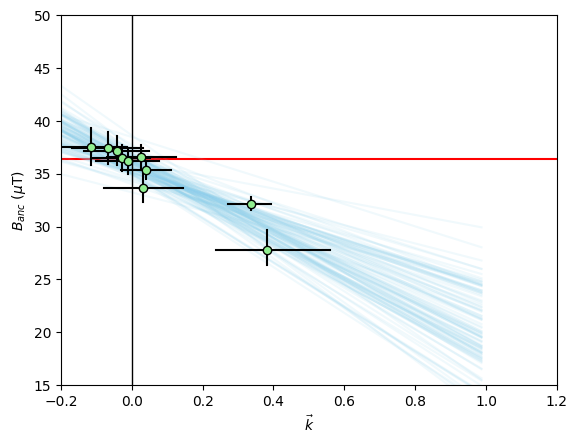

In [10]:
fig,ax=plt.subplots()
site.regplot(ax)

#x limits, y limits and y label are not set by this method as it is used slightly differently in our GUI.

ax.set_xlim(-0.2,1.2)
ax.set_ylim(15,50);
ax.set_ylabel('$B_{anc}$ ($\mu$T)')
ax.axhline(36.4,color='r',zorder=0);

The green dots with black errorbars are our individual specimen estimates for $\vec{k}$ and $B_{\textrm{anc}}$ and their 95% confidence intervals. The blue lines are our BiCEP fits to these data. Notice that these lines cross the $\vec{k}=0$ line close to the expected field value, yielding an accurate and precise estimate of the paleointensity, without excluding any specimens! We can get a sense of the distribution of estimates for using the `site.histplot()` method.

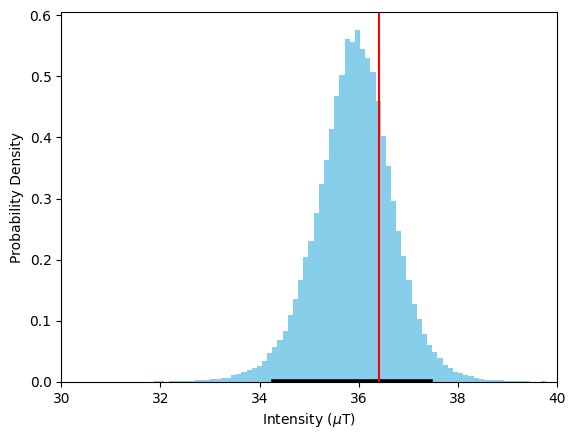

In [11]:
fig,ax=plt.subplots()
site.histplot(ax)

ax.set_xlim(30,40)
ax.axvline(36.4,color='r'); #Actual field at this site

We can see that our estimate for $B_{\textrm{anc}}$  is close to the median value of this distribution, and well within the 95% confidence interval denoted by the black line. Our estimate is accurate and precise, with a 95% confidence interval of ~4 μT.

### Data manipulation and choosing interpretations.

You might notice that some of our specimens have larger error bars on their $\vec{k}$ estimates than others in our BiCEP fitting figure. Let's investigate what's going on with these specimens.

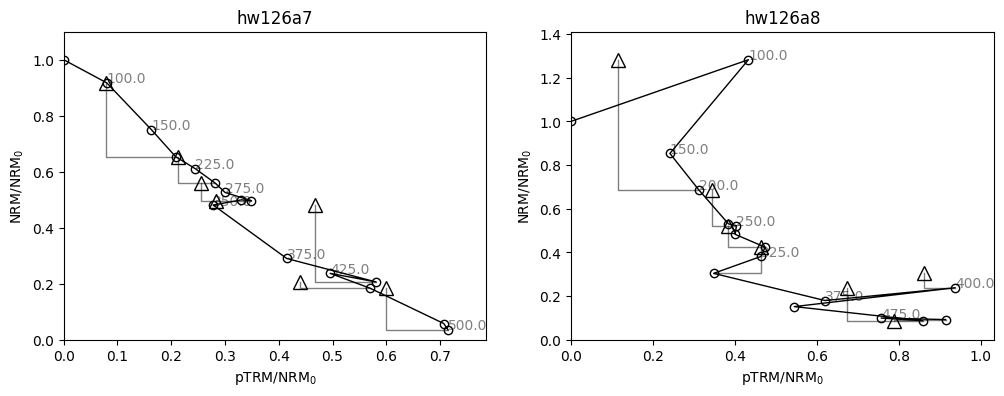

In [12]:
fig,ax=plt.subplots(1,2,figsize=(12,4));
hw126a7=site['hw126a7']
hw126a8=site['hw126a8']
hw126a7.plot_circ(ax[0],tangent=True)
hw126a7.plot_arai(ax[0])
ax[0].set_title('hw126a7')
hw126a8.plot_circ(ax[1],tangent=True)
hw126a8.plot_arai(ax[1])
ax[1].set_title('hw126a8');

For these specimens, our analysis might be slightly different. Our specimen "hw126a7" has a pTRM check (triangle) which is very displaced from the line at the 300 °C temperature step. This is a repeat of the 300 °C in-field measurement after heating to 350 °C in zero field. It indicates a chemical alteration of the specimen between 300 °C and 350 °C. We can use this by calculating the DRAT statistic (Selkin & Tauxe, 2000), using the attribute specimen.drat, and noticing that it is high (criteria vary, but 15 is considered a high value by any metric). Although we have already demonstrated the effectiveness of BiCEP without using this statistic, we have evidence that we should only be using the temperatures up to 300 °C for this specimen. We can do this using the method `specimen.change_temps()`, and we save this change using the method `specimen.save_changes()`. Note that our attributes, such as specimen.drat are affected by the change in temperatures.

Our specimen "hw126a8" has a very early failed pTRM check, and fitting a circle seems like it would probably be inappropriate. We can elect to exclude this specimen as no part of the line is likely to give a good paleointensity estimate. This can be done by setting the attribute `specimen.active=False` Ultimately, due to its large uncertainty in the circle fit, it has very little effect on the estimate of $B_{\textrm{anc}}$ in the first place.

The MAD statistic of Kirshvink (1980) and the DANG Statistic (Tanaka & Kobayashi, 2003, Tauxe & Staudigel, 2004) are also available using the methods `specimen.mad` and `specimen.dang`.

In [13]:
#Printing the DRAT parameter of the specimen to 
print('hw126a7 DRAT: %2.1f'%hw126a7.drat)
print('hw126a8 DRAT: %2.1f'%hw126a8.drat)

lowerTemp=0
upperTemp=300
lowerTempK,upperTempK=lowerTemp+273,upperTemp+273

hw126a7.change_temps(lowerTempK,upperTempK)
hw126a7.save_changes()
hw126a8.active=False

hw126a7 DRAT: 0.0
hw126a8 DRAT: 0.0


We now run the BiCEP method again with these changes in place, and plot up our site results with the results for these two specimens.

In [14]:
site.BiCEP_fit()

19:21:47 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

19:22:23 - cmdstanpy - INFO - CmdStan done processing.


19:22:23 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 684 divergent transitions (2.3%)
	Chain 2 had 213 divergent transitions (0.7%)
	Chain 3 had 889 divergent transitions (3.0%)
	Chain 4 had 838 divergent transitions (2.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


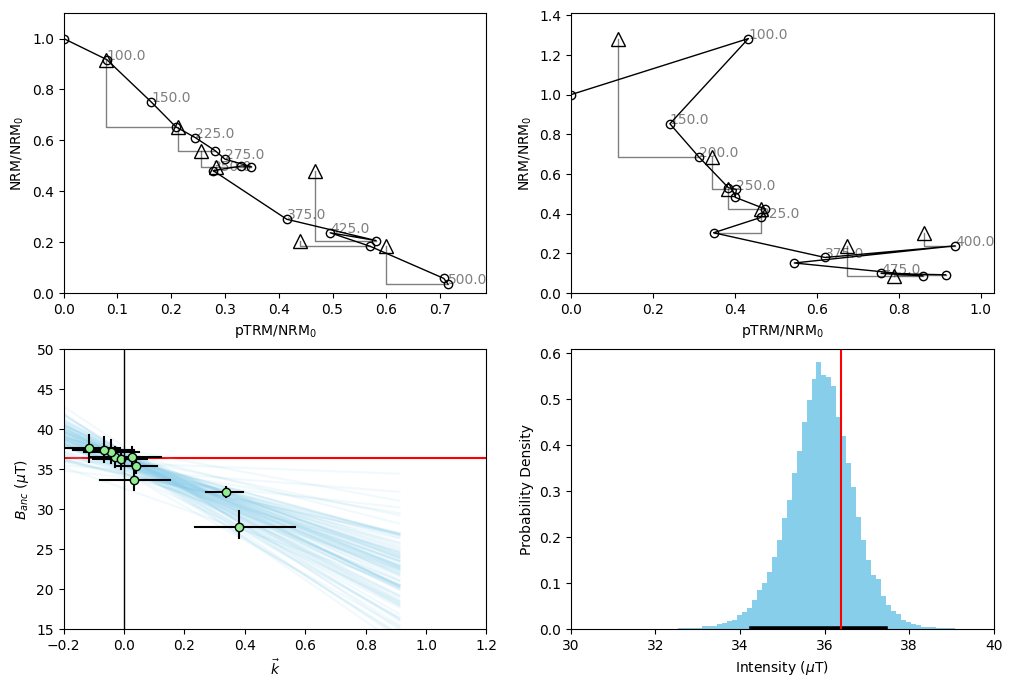

In [15]:
#set up subplots
fig,ax=plt.subplots(2,2,figsize=(12,8))

#Plot our Arai plots with circle fits
hw126a7.plot_circ(ax[0,0])
hw126a7.plot_arai(ax[0,0])

hw126a8.plot_circ(ax[0,1])
hw126a8.plot_arai(ax[0,1])


#Plot our plot of the BiCEP fit.
site.regplot(ax[1,0])
ax[1,0].set_xlim(-0.2,1.2)
ax[1,0].set_ylim(15,50);
ax[1,0].set_ylabel('$B_{anc}$ ($\mu$T)')
ax[1,0].axhline(36.4,color='r',zorder=0);


#Plot our histogram
site.histplot(ax[1,1])
ax[1,1].set_xlim(30,40)
ax[1,1].axvline(36.4,color='r');

We notice from our histogram that doing this data manipulation has very slightly improved our accuracy and precision- but the overall distribution has not changed vary much. We notice from our Arai plot for specimen hw126a7 that the uncertainty in our circle fits has become much larger by excluding these temperature steps. This is because we assume the uncertainty in the circle fit for the whole Arai plot, rather than just the segment we're looking at. In this way, we are penalized for excluding data from the Arai plot, without having to use some kind of "length of the line" criterion.

### Auto Interpreting With BiCEP

Specimens can be auto-interpreted using the `auto_interpret` function from the `criteria` module. This function allows us to auto-interpret by first applying minimal criteria, (MAD, DANG and DRAT) to ensure that we have an interpretation which is origin-trending and for which there is no alteration. Within these specimens, we then take the interpretation that maximizes FRAC.

We only use specimens for which DANG and DRAT are <10 and MAD $_{\text{Coe}}$<5 and a minimum number of steps of four. For more information see Paterson et al (2014) . For information on MAD $_{\text{Coe}}$, please refer to Cych et. al. (2023). 

The following functions show how one can auto interpret data using BiCEP. You do not need to rerun these analyses to plot the figures as the BiCEP fits are saved in `.nc` files in this folder, and the interpretation temperatures are saved to a `.redo` file.

In [16]:
from BiCEP.criteria import auto_interpret
#Example of auto_interpreting BiCEP_data
#Get samples where MAD_coe < 5, DANG < 10, DRAT < 10
auto_interpret(site,mad=5,dang=10,drat=10,mad_type='mad_coe')
site.BiCEP_fit()

19:22:30 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

19:23:21 - cmdstanpy - INFO - CmdStan done processing.


19:23:21 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 614 divergent transitions (2.0%)
	Chain 2 had 953 divergent transitions (3.2%)
	Chain 3 had 838 divergent transitions (2.8%)
	Chain 4 had 1639 divergent transitions (5.5%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


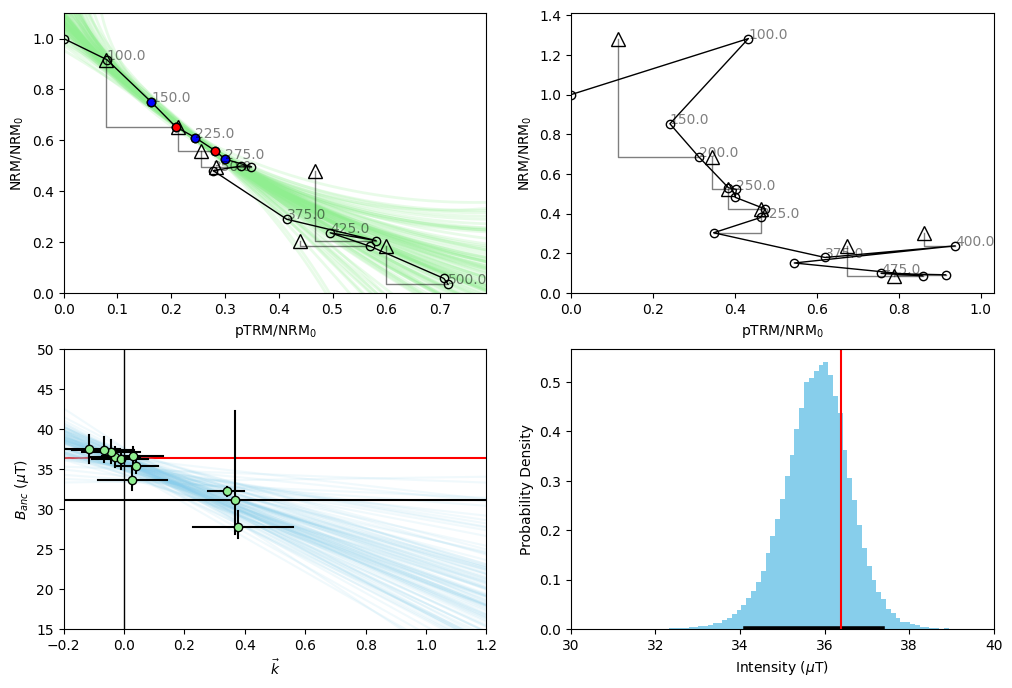

In [17]:
#set up subplots
fig,ax=plt.subplots(2,2,figsize=(12,8))

#Plot our Arai plots with circle fits
hw126a7.plot_circ(ax[0,0])
hw126a7.plot_arai(ax[0,0])

hw126a8.plot_circ(ax[0,1])
hw126a8.plot_arai(ax[0,1])


#Plot our plot of the BiCEP fit.
site.regplot(ax[1,0])
ax[1,0].set_xlim(-0.2,1.2)
ax[1,0].set_ylim(15,50);
ax[1,0].set_ylabel('$B_{anc}$ ($\mu$T)')
ax[1,0].axhline(36.4,color='r',zorder=0);


#Plot our histogram
site.histplot(ax[1,1])
ax[1,1].set_xlim(30,40)
ax[1,1].axvline(36.4,color='r');

Notice that to satisfy MAD and DRAT, even fewer points from specimen hw126a7 were selected. This has led to the enormous error bars on the estimate from this specimen, seen in the bottom left figure. Sometimes this causes problems with the model fit if the number of points is too small. If this is the case, then try setting the `specimen.active` attribute to False for that specimen.

## Automating, diagnostics and saving fits
We can test whether a fit has yielded a successful paleointensity using the `get_sampler_succcess()` function from the `extract` module. Check the docstring to see options -  but by default this only accepts things which are an A or a B grade.

In [18]:
from BiCEP.extract import get_sampler_success

get_sampler_success(site)

hw126 successful! Estimated intensity 35.8 with bounds of 34.1 - 37.3 μT


True

We can automate the entire process of getting obtaining a paleointensity and checking whether it's successful using the `run_site_fit()` function from the `extract` module. The `save_nc` argument can be used to save to netcdf if the result passes.

In [20]:
from BiCEP.extract import run_site_fit
run_site_fit(site,save_nc=True)

19:23:39 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

19:23:49 - cmdstanpy - INFO - CmdStan done processing.


19:23:50 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 79 divergent transitions (0.8%)
	Chain 2 had 55 divergent transitions (0.5%)
	Chain 3 had 21 divergent transitions (0.2%)
	Chain 4 had 69 divergent transitions (0.7%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


hw126 successful! Estimated intensity 35.9 with bounds of 34.3 - 37.4 μT


You should see a file called `hw126.nc` has appeared in the folder. This is our saved fit that can be reopened by the GUI next time.

## Advanced user options - tweaks and accessing raw data
### The "fit" object
For each site, BiCEP creates a `fit` attribute which contains all the information for the fit to that specimen. This is an `arviz.InferenceData` object

In [21]:
site.fit

Inference data with groups:
	> posterior
	> sample_stats

The raw data from this object isn't particularly helpful. Fortunately, we have a helper function in the `extract` module called `extract_values()`. You can extract the following parameters:

`int_site` : predicted paleointensity

`sd_site` : predicted standard deviation from best fit line of paleointensity

`k` : predicted curvature for each specimen

`dist_to_edge`: predicted $D$ for each specimen (see Cych et al. 2021)

`c`: predicted line slope (relationship between intensity and curvature) for the site

`phi` : predicted $\phi$ for each specimen (see Cych et al 2021.)

`R` : predicted $R$ same as ($1/\vec{k}$) for each specimen

`x_c` : precited $x_{c}$ for each specimen (see Cych et al 2021.)

`y_c` : predicted $y_{c}$ for each specimen (see Cych et al 2021.)

Let's extract `int_site` and plot a histogram. It should look the same as the result from `site.histplot()`

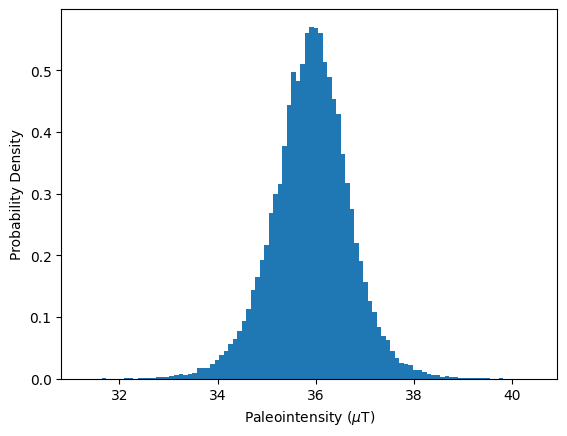

In [22]:
from BiCEP.extract import extract_values
pint_dist=extract_values(site.fit,'int_site')
plt.hist(pint_dist,bins=100,density=True);
plt.ylabel('Probability Density')
plt.xlabel('Paleointensity ($\mu$T)');

### Getting Sampler Diagnostics
The $\hat{R}$ sampler diagnostics can be obtained using the `site.get_specimen_rhats()` method. This gives the worst $\hat{R}$ value from all of the specimens.

To check this for each specimen, we can check the `specimen.rhat` attribute.

In [23]:
print('Worst r_hat:',site.get_specimen_rhats())
print('hw126a2 r_hat:', specimen.rhat)
print('hw126a7 r_hat:', hw126a7.rhat)

Worst r_hat: 1.0004317552003188
hw126a2 r_hat: 1.0001539525687053
hw126a7 r_hat: 1.000453824652979


On this run, hw126a7 was the source of the largest $\hat{R}$ - even though this is the worst, we find $ 1.0 < \hat{R} < 1.1 $ - which indicates that there were no problems with the sampling (may change between runs).

### Choosing models and MCMC sampling options
Sometimes, high $\hat{R}$ can be caused by sampling issues that can be fixed by using a different parameterization of the model. This is an optional parameter in `site.BiCEP_fit()`. The two models are `BiCEP.model_circle_fast` and `BiCEP.model_circle_slow` (found in the root BiCEP package). Default behaviour is to use the slow model when the number of specimens is less than 7 and the fast model when the number of specimens is greater than 7. The slow model can give more detailed results, but sometimes may perform worse. Try the other if the default doesn't seem to be working. Other parameters for BiCEP_fit include `n_samples` which controls the number of samples (default 30000). Upping this number will take longer but improve the fit.

### Using BiCEP to group by sample instead of site
This can be done by calling the `data.switch_grouping()` method. It doesn't work on an individual sample/site basis (but this can be edited in the csv files BiCEP uses).